# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
pip install citipy==0.0.5

     |████████████████████████████████| 563kB 1.5MB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-cp37-none-any.whl size=559703 sha256=4efa5d3cb28aefa9f3506ef9f23cb2427233b9da1a7c53ee7559a39f8038915d
  Stored in directory: /Users/paulaurteaga/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time
import datetime

from config import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
counter=1
set_num=1
new_cities=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&q="
print('Beginning data retrieval')
print('-----------------------------')
for city in cities:
    response = requests.get(f'{query_url}{city}&units=metric').json()
    if counter<=50:
        try:
            print(f"Processing record {counter} of set {set_num} |{response['name']}")
            new_cities.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])
            counter=counter+1
        except (KeyError, IndexError):
            print("City not found. Skipping...")
            
    else:
        counter=1
        set_num=set_num+1
print('-----------------------------')
print('Data Retreival completed')
print('-----------------------------')

Beginning data retrieval
-----------------------------
Processing record 1 of set 1 |Asopos
Processing record 2 of set 1 |Bluff
Processing record 3 of set 1 |Busselton
Processing record 4 of set 1 |Crib Point
Processing record 5 of set 1 |Rikitea
Processing record 6 of set 1 |Atuona
Processing record 7 of set 1 |Hermanus
Processing record 8 of set 1 |Yerbogachen
Processing record 9 of set 1 |Pecos
Processing record 10 of set 1 |Tuktoyaktuk
Processing record 11 of set 1 |Ushuaia
Processing record 12 of set 1 |Punta Arenas
Processing record 13 of set 1 |Luena
Processing record 14 of set 1 |Barinas
Processing record 15 of set 1 |Jamestown
Processing record 16 of set 1 |Avarua
Processing record 17 of set 1 |Puerto Ayora
Processing record 18 of set 1 |Galveston
Processing record 19 of set 1 |Yulara
Processing record 20 of set 1 |Gualeguaychu
Processing record 21 of set 1 |Bredasdorp
Processing record 22 of set 1 |Arraial do Cabo
Processing record 23 of set 1 |Olafsvik
Processing record 24 o

Processing record 42 of set 4 |Sitka
Processing record 43 of set 4 |Calvia
Processing record 44 of set 4 |Torbay
Processing record 45 of set 4 |Reserva
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing record 46 of set 4 |Takanabe
Processing record 47 of set 4 |Ducos
Processing record 48 of set 4 |Voznesenskoye
Processing record 49 of set 4 |Ardakan
Processing record 50 of set 4 |Takoradze
Processing record 1 of set 5 |Nyurba
Processing record 2 of set 5 |Anju
Processing record 3 of set 5 |Vestmannaeyjar
Processing record 4 of set 5 |Padang
Processing record 5 of set 5 |Chapais
Processing record 6 of set 5 |Sinegorye
Processing record 7 of set 5 |Porto-Novo
Processing record 8 of set 5 |Kupang
Processing record 9 of set 5 |Venado Tuerto
Processing record 10 of set 5 |Khorixas
Processing record 11 of set 5 |Xique-Xique
Processing record 12 of set 5 |Jalu
Processing record 13 of set 5 |Ritchie
Processing record 14 of set 5 |San Policarpo
Proce

Processing record 35 of set 8 |Katobu
City not found. Skipping...
Processing record 36 of set 8 |Hualmay
Processing record 37 of set 8 |Klyuchi
Processing record 38 of set 8 |Margate
Processing record 39 of set 8 |Ubari
City not found. Skipping...
Processing record 40 of set 8 |Soyo
Processing record 41 of set 8 |Aksarka
Processing record 42 of set 8 |Krasnosel'kup
Processing record 43 of set 8 |Bafq
Processing record 44 of set 8 |Kanker
City not found. Skipping...
Processing record 45 of set 8 |San Andres
Processing record 46 of set 8 |Kununurra
Processing record 47 of set 8 |Iskateley
Processing record 48 of set 8 |Bilibino
Processing record 49 of set 8 |Liberal
Processing record 50 of set 8 |Luau
Processing record 1 of set 9 |Assiut
City not found. Skipping...
Processing record 2 of set 9 |Launceston
Processing record 3 of set 9 |Honningsvag
Processing record 4 of set 9 |Zhigansk
Processing record 5 of set 9 |Shihezi
Processing record 6 of set 9 |Pottsville
Processing record 7 of se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
dic={'City':new_cities,'Cloudiness':cloudiness,'Country':country,'Date':date,'Humidity':humidity, 'Lat':lat,'Lng':lng,'Max Temp':max_temp,'Wind speed':wind_speed}
weather_data=pd.DataFrame(dic)
weather_data.to_csv('../weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind speed
0,Asopos,0,GR,1579829387,68,36.73,22.87,10.15,12.68
1,Bluff,77,NZ,1579829387,34,-46.60,168.33,25.61,1.89
2,Busselton,2,AU,1579829388,59,-33.65,115.33,22.22,0.89
3,Crib Point,18,AU,1579829388,59,-38.35,145.20,22.22,8.56
4,Rikitea,0,PF,1579829182,78,-23.12,-134.97,26.22,7.50


In [6]:
#Going to convert the 10 digit date format to a readable format
weather_data['Date']=pd.to_datetime(weather_data['Date'])
weather_data['Date']=weather_data['Date'].map(lambda x: x.strftime('%Y/%m/%d'))
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind speed
0,Asopos,0,GR,1970/01/01,68,36.73,22.87,10.15,12.68
1,Bluff,77,NZ,1970/01/01,34,-46.60,168.33,25.61,1.89
2,Busselton,2,AU,1970/01/01,59,-33.65,115.33,22.22,0.89
3,Crib Point,18,AU,1970/01/01,59,-38.35,145.20,22.22,8.56
4,Rikitea,0,PF,1970/01/01,78,-23.12,-134.97,26.22,7.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

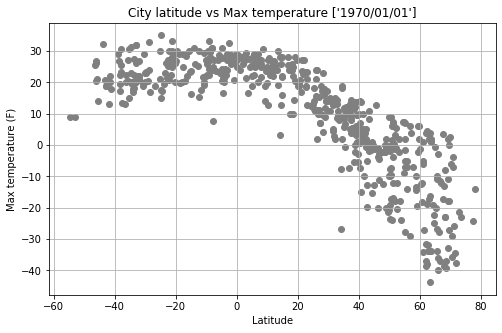

As we can see in this Latitude vs Max temperature analysis on ['1970/01/01'] we conlude that the farder we go from the Equator, latitude 0, temperatures will likely start to drop, no mather if we go up or down, and they will drop way faster as we go up the equator


In [8]:
date=weather_data["Date"].unique()
plt.figure(figsize=(8,5))
plt.scatter(weather_data['Lat'],weather_data['Max Temp'],color='grey')
plt.title(f'City latitude vs Max temperature {date}')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig('../images/latvsmaxtemp.png')
plt.show()
print(f'As we can see in this Latitude vs Max temperature analysis on {date} we conlude that the farder we go from the Equator, latitude 0, temperatures will likely start to drop, no mather if we go up or down, and they will drop way faster as we go up the equator')

#### Latitude vs. Humidity Plot

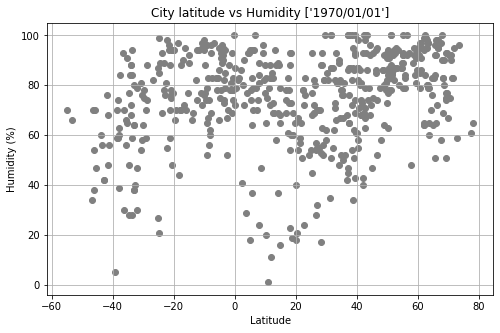

In tnis scatter plot we see there is not a strong correlation between latitude and humidity, since data points seem to be really dispersed. Humidity remains between 60-100% most of the time, no matter which latitude point we are on


In [10]:
plt.figure(figsize=(8,5))
plt.scatter(weather_data['Lat'],weather_data['Humidity'],color='grey')
plt.title(f'City latitude vs Humidity {date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('../images/latvshum.png')
plt.show()
print(f'In tnis scatter plot we see there is not a strong correlation between latitude and humidity, since data points seem to be really dispersed. Humidity remains between 60-100% most of the time, no matter which latitude point we are on')

#### Latitude vs. Cloudiness Plot

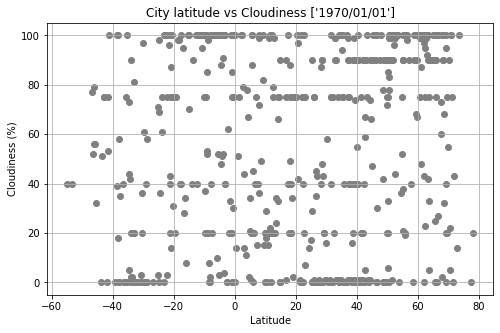

Same as the last plot, humidity data points dont seem concentrated enough on any specific latitude point to aprove a correlation. We do appreciate a simple fact, whenever cloudiness has reached its limits on one side of the equator, either 0 or 100%, it will likely reach the same limits on the exact opposite side of the equator


In [12]:
plt.figure(figsize=(8,5))
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'],color='grey')
plt.title(f'City latitude vs Cloudiness {date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('../images/latvscloud.png')
plt.show()
print(f'Same as the last plot, humidity data points dont seem concentrated enough on any specific latitude point to aprove a correlation. We do appreciate a simple fact, whenever cloudiness has reached its limits on one side of the equator, either 0 or 100%, it will likely reach the same limits on the exact opposite side of the equator')

#### Latitude vs. Wind Speed Plot

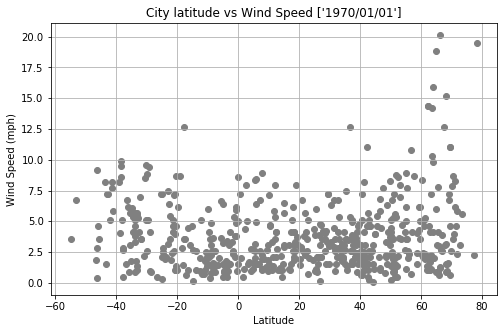

According to this plot, we can say that at some extreme latitude points, such as lower than -60 and higher than 60, winds speed will probably be higher than normal, but other than that latitude doesnt really affect wind speed


In [13]:
plt.figure(figsize=(8,5))
plt.scatter(weather_data['Lat'],weather_data['Wind speed'],color='grey')
plt.title(f'City latitude vs Wind Speed {date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('../images/latvswind.png')
plt.show()
print(f'According to this plot, we can say that at some extreme latitude points, such as lower than -60 and higher than 60, winds speed will probably be higher than normal, but other than that latitude doesnt really affect wind speed' )

## Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_dataframe=weather_data.loc[weather_data['Lat']>=0]
southern_dataframe=weather_data.loc[weather_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8465859378859146


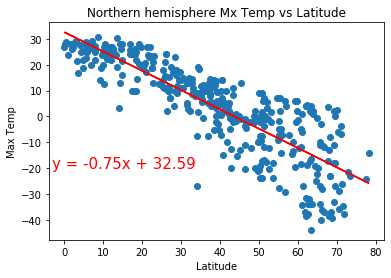

In [17]:
x_values = northern_dataframe['Lat']
y_values = northern_dataframe['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(-3,-20))
plt.title('Northern hemisphere Mx Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/northlatvsmaxtemp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3500193003459102


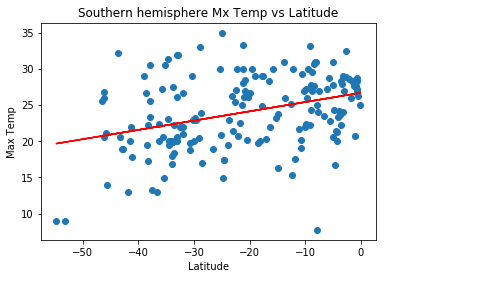

In [42]:
x_values = southern_dataframe['Lat']
y_values = southern_dataframe['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(-3,0))
#for some reason the equation is not showing, even tho its at the same position as the upper one
plt.title('Southern hemisphere Mx Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/southlatvsmaxtemp.png')
plt.show()

In [ ]:
In both hemospheres, we can see that the farder we get from the equator the temperatures will drop right away. 
However, if we send someone 50 points north the equator and another one 50 points south, the second one, according
to our linear regression equation will be experimenting a 20 degree avg temperature while our guy in the north will
be probably freezing at 0 degrees more or less. So as the r-quare value of -0.8 shows in the first picture, the strong
negative correlation between max temp and latitude tells us the higher one of the variables gets the lower the other
one will get and viceversa.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3181876516275391


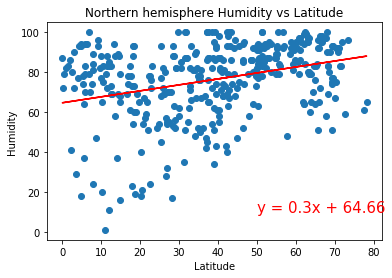

In [29]:
x_values = northern_dataframe['Lat']
y_values = northern_dataframe['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(50,10))
plt.title('Northern hemisphere Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/northlatvshum.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.462859072116355


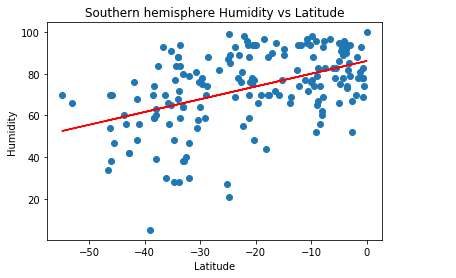

In [31]:
x_values = southern_dataframe['Lat']
y_values = southern_dataframe['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
lt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(50,10))
#for some reason the equation is not showing, even tho its at the same position as the upper one
plt.title('Southern hemisphere Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/southlatvshum.png')
plt.show()

In [ ]:
After seeing each plot and their respective r-square values, 0.31 and 0.46, we can see that theres a 
positive correlation no matter which hemisphere, but neither of them are strong enough to build a predictive model.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23211832678352753


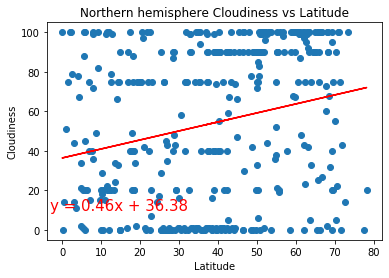

In [35]:
x_values = northern_dataframe['Lat']
y_values = northern_dataframe['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(-3,10))
plt.title('Northern hemisphere Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/northlatvscloud.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25709869993047935


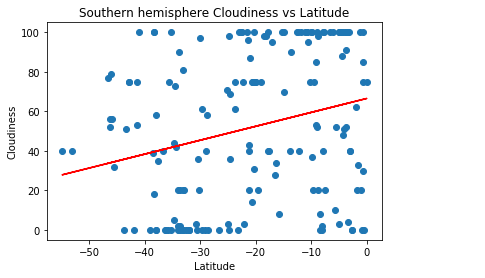

In [36]:
x_values = southern_dataframe['Lat']
y_values = southern_dataframe['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(-3,10))
#for some reason the equation is not showing, even tho its at the same position as the upper one
plt.title('Southern hemisphere Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/southlatvscloud.png')
plt.show()

In [ ]:
In both hemispheres the positive r-quare is really similar, 0.23 and 0.25, which doesnt really represent a strong correlation.
Even though, if we put our guy 50 points north the equator humidity will likely be close to 60%, and our guy 50 
points south the equator will be experimenting a 20% humidity level, so the humidity drops faster in the southern
hemisphere than the northern as we keep walking away the lat 0.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.21349567046134954


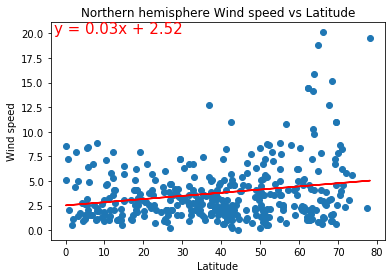

In [37]:
x_values = northern_dataframe['Lat']
y_values = northern_dataframe['Wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(-3,20))
plt.title('Northern hemisphere Wind speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/northlatvswind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3761540853065252


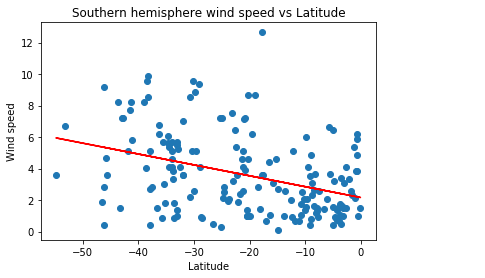

In [40]:
x_values = southern_dataframe['Lat']
y_values = southern_dataframe['Wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(-3,10))
#for some reason the equation is not showing, even tho its at the same position as the upper one
plt.title('Southern hemisphere wind speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/southlatvswind.png')
plt.show()

In [ ]:
Here we can see that in the northern hemisphere theres a positive correlation, not that strong thought (0.21) and
a negative similar correlation in the southern hemisphere (-0.37). Again, if we get our same two guys at the exact
opposite places north and south the equator, the one in the south will be experimenting wind speed change much earlier.